Part 1

In [ ]:
# 1
count <- function(df) {
  types <- c("numeric", "factror", "character")
  nums <- c()

  for (i in 1:length(df[1,])) {
    nums <- c(nums, class(df[,i]))
  }

  nums <- table(nums)

  naToZero <- function(x) if (is.na(x)) 0 else x

  for (name in types) {
    nums[name] <- naToZero(nums[name])
  }

  return (c(nums[types]))
}

In [ ]:
id <- 1:3
country <- c("Flatland", "Wonderland", "Sphereland")
craziness <- c(20, 15, 18)
region_type <- c("A", "B", "A")
author <- c("Abbot", "Carroll", "Burger")
size <- c(10, 100, 30)

df <- data.frame(id, country, craziness, region_type, author, size)
df
count(df)
# sapply(m, class)

id,country,craziness,region_type,author,size
<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Flatland,20,A,Abbot,10
2,Wonderland,15,B,Carroll,100
3,Sphereland,18,A,Burger,30


numeric   factror character 
        2         0         3

In [ ]:
# 2
numeric_df <- function(df) {
  new_df <- as.data.frame(Filter(is.numeric, df))
  return (new_df)
}

In [ ]:
numeric_df(df)

id,craziness,size
<int>,<dbl>,<dbl>
1,20,10
2,15,100
3,18,30


In [ ]:
# 3
median_vec <- function(vec) {
  if (is.numeric(vec)) {
    return (median(vec, na.rm = TRUE))
  } else {
     cat('Vector is not numeric, cannot compute the median')
     return (NA)
  }
}

In [ ]:
median_vec(c(1, 2, 3, 4, 5, 6))

[1] 3.5

In [ ]:
median_vec("Str")

Vector is not numeric, cannot compute the median

[1] NA

**Part 2. Time series analysis**

A time series is a sequence of observations ordered in time (or space). If a phenomenon is observed for some time, it makes sense to present data in the order in which the results occurred.

In [ ]:
# The most well - known package for working with financial data in R is quantmod. It allows you to get data from various sources, build, and test trading models.

if("quantmod" %in% rownames(installed.packages()) == FALSE) {
  install.packages("quantmod")
}

library(quantmod)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following object is masked _by_ ‘.GlobalEnv’:

    first


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
if ("stringr" %in% rownames(installed.packages()) == FALSE) {
    install.packages("stringr") 
}
library(stringr)

In [ ]:
downloadable_stocks <- c("ATVI", "^IXIC")
quantmod::getSymbols(Symbols = downloadable_stocks, src = "yahoo", from = as.Date.character("1900-01-01"))

[1] "ATVI"  "^IXIC"

In [ ]:
df <- data.frame(get(downloadable_stocks[1]))
head(df, 10)

,ATVI.Open,ATVI.High,ATVI.Low,ATVI.Close,ATVI.Volume,ATVI.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993-10-25,1.250000,1.250000,0.937500,0.937500,18000,0.840151
1993-10-26,1.229167,1.229167,0.854167,0.864583,189600,0.774806
1993-10-27,0.864583,0.864583,0.864583,0.864583,0,0.774806
1993-10-28,0.708333,0.833333,0.583333,0.822917,30000,0.737466
1993-10-29,0.875000,0.875000,0.833333,0.833333,172800,0.746801
1993-11-01,0.833333,0.875000,0.833333,0.875000,76800,0.784141
1993-11-02,0.833333,0.875000,0.833333,0.875000,12000,0.784141
1993-11-03,0.854167,0.979167,0.854167,0.958333,48000,0.858821
1993-11-04,1.000000,1.000000,0.958333,0.958333,25200,0.858821


In [ ]:
downloadable_stocks <- stringr::str_remove(downloadable_stocks, "[:punct:\\^]")
rm(list = downloadable_stocks)

In [ ]:
head(df)

,ATVI.Open,ATVI.High,ATVI.Low,ATVI.Close,ATVI.Volume,ATVI.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993-10-25,1.250000,1.250000,0.937500,0.937500,18000,0.840151
1993-10-26,1.229167,1.229167,0.854167,0.864583,189600,0.774806
1993-10-27,0.864583,0.864583,0.864583,0.864583,0,0.774806
1993-10-28,0.708333,0.833333,0.583333,0.822917,30000,0.737466
1993-10-29,0.875000,0.875000,0.833333,0.833333,172800,0.746801
1993-11-01,0.833333,0.875000,0.833333,0.875000,76800,0.784141


The periodicity of data in which the trend component is present is in fact difficult to study, so in order to look for a periodic dependence in the source data, it is necessary to prepare and remove the trend dependence from the source data in advance, while preserving the qualitative features of the fluctuations.

In [ ]:
# Preparing data using proportions
proportion <- function(x, dt, func) {
  stopifnot(is.vector(x) & class(x) == "numeric")
  stopifnot(is.numeric(dt) & dt %% 1 == 0 & dt > 0)
  stopifnot(2*dt < length(x))
  stopifnot(is.function(func))

  # For correct work of a logarithm
  # x – the original vector of the time series with the trend
  min_elem <- min(x)
  x <- sapply(x, function(x) x + min_elem + 1)

  # y – an input time series for which the periodicity is being investigated
  # dt - trial shift by index(or time), which determines the degree of information extraction from the data
  y <- rep(c(0), length(x) - 2*dt)
  
  for (i in (1 + dt):(length(x) - dt)) {
    y[i - dt] <- func(x[i - dt], x[i], x[i + dt])
  }

  return (y)
}

In [ ]:
arifmProportion <- function(x, dt = 1) proportion(x, dt, function(prev, current, next_) log((prev + next_) / (2*current)))

In [ ]:
geomProportion <- function(x, dt=1) proportion(x, dt, function(prev, current, next_) log(prev * next_ /  current^2))

In [ ]:
garmProportion <- function(x, dt=1) proportion(x, dt, function(prev, current, next_) log(2 * prev * next_ / (current * (prev + next_))))

In [ ]:
out_of_trend <- function(x, dt=1, method="Arifm") {
    stopifnot(method == "Arifm" || method == "Geom" || method == "Garm")
    
    return (switch(method,
                  "Arifm" = arifmProportion(x, dt),
                  "Geom" = geomProportion(x, dt),
                  "Garm" = garmProportion(x, dt),
                  arifmProportion(x, dt)))
}

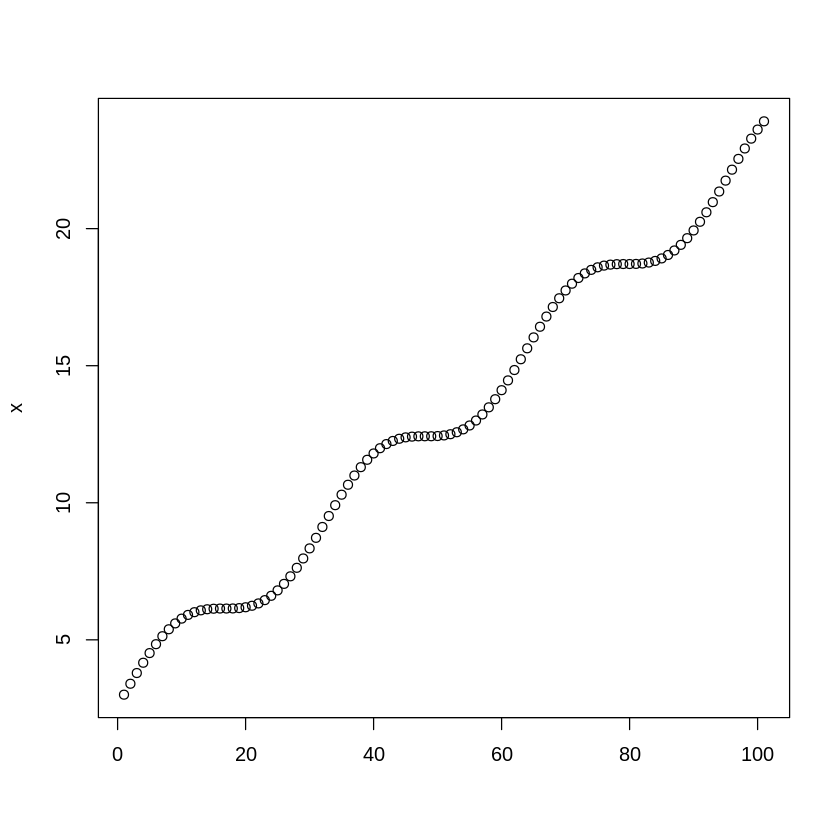

In [ ]:
t = seq(0, 10, 0.1)
x = 2*t + 3 + sin(2*t)
plot(x, xlab = "")

In [ ]:
mean(x)

[1] 13.03372

In [ ]:
xn <- out_of_trend(x, method = "Arifm")
mean(xn)

[1] -6.821495e-05

In [ ]:
xn <- out_of_trend(x, method = "Geom")
mean(xn)

[1] -0.0004506113

In [ ]:
xn <- out_of_trend(x, method="Garm")
mean(xn)

[1] -0.0003823964

In [ ]:
AlterJohns_Tau <- function(y, tau) {
    stopifnot(is.vector(y) & is.numeric(y))
    
    n <- length(y)
    stopifnot(is.numeric(tau) & tau %% 1 == 0 & n > tau)
    
    summa <- 0
    for (i in 1:(n - tau)) {
        summa <- summa + abs(y[i + tau] - y[i])
    }
    
    return (1 / (n - tau) * summa)
}

AlterJohns <- function(y) {
    return (sapply(1:(length(y) - 1), function(i) (AlterJohns_Tau(y, i))))
}

In [ ]:
xn_AJ <- AlterJohns(xn)
head(xn_AJ)

[1] 0.0001658699 0.0003315444 0.0004982938 0.0006603714 0.0008196222
[6] 0.0009689454

In [ ]:
which.min(xn_AJ)

[1] 0.0001658699

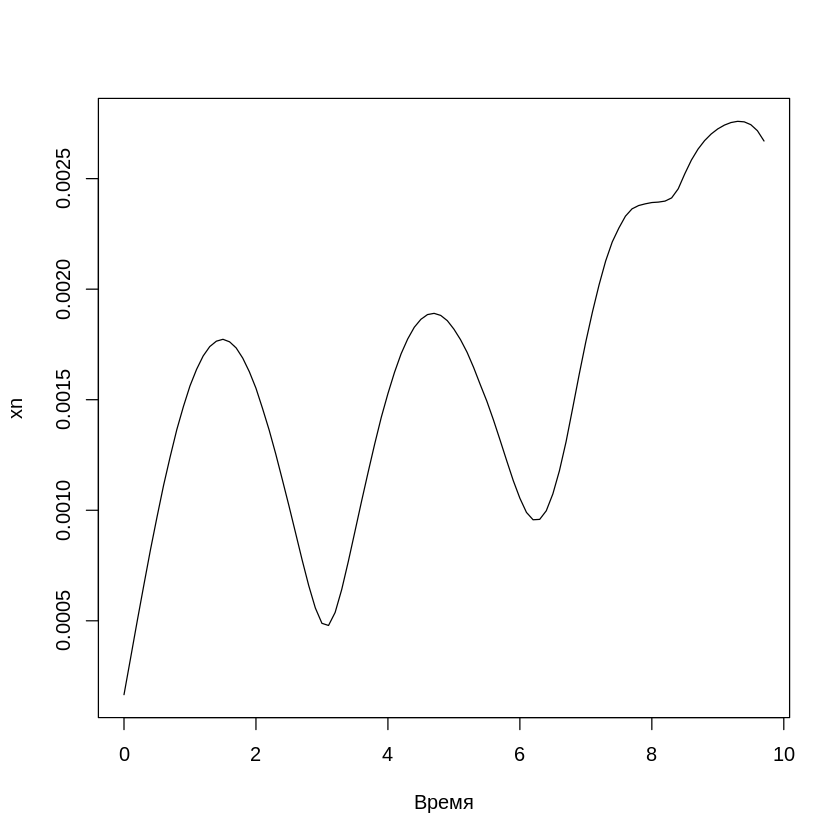

In [ ]:
plot(x = t[1:(length(xn) - 1)], y = AlterJohns(xn), type = "l", xlab = "Время", ylab = "xn")

In [ ]:
out_of <- out_of_trend(df[[1]], method="Geom")
result <- AlterJohns(out_of)
head(result)

[1] 0.03853424 0.03151013 0.03182507 0.03185726 0.03228967 0.03147626

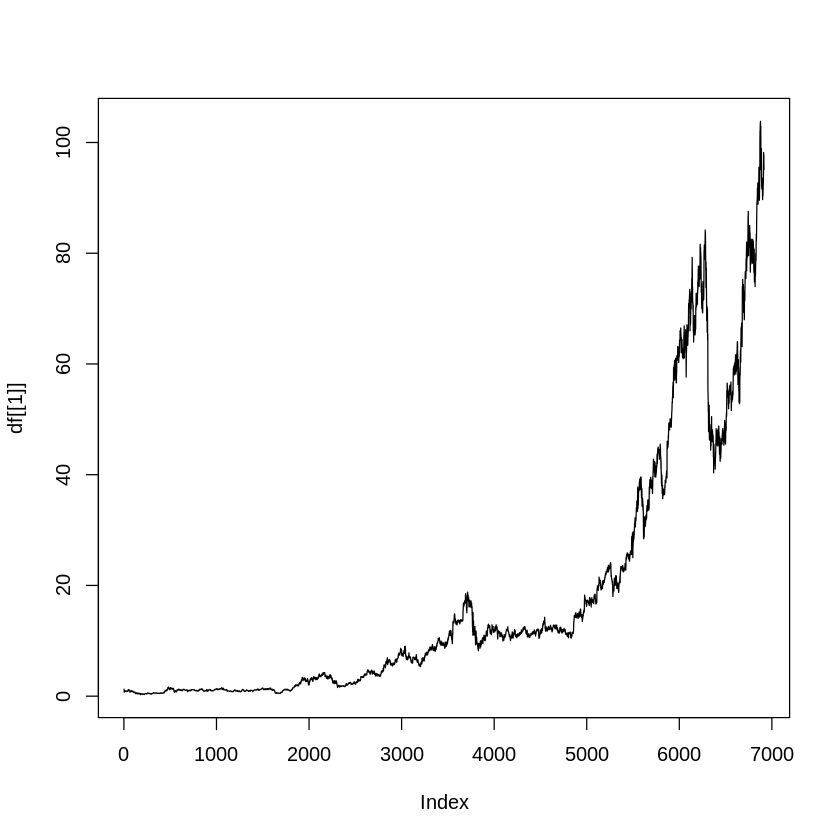

In [ ]:
plot(df[[1]], type="l")

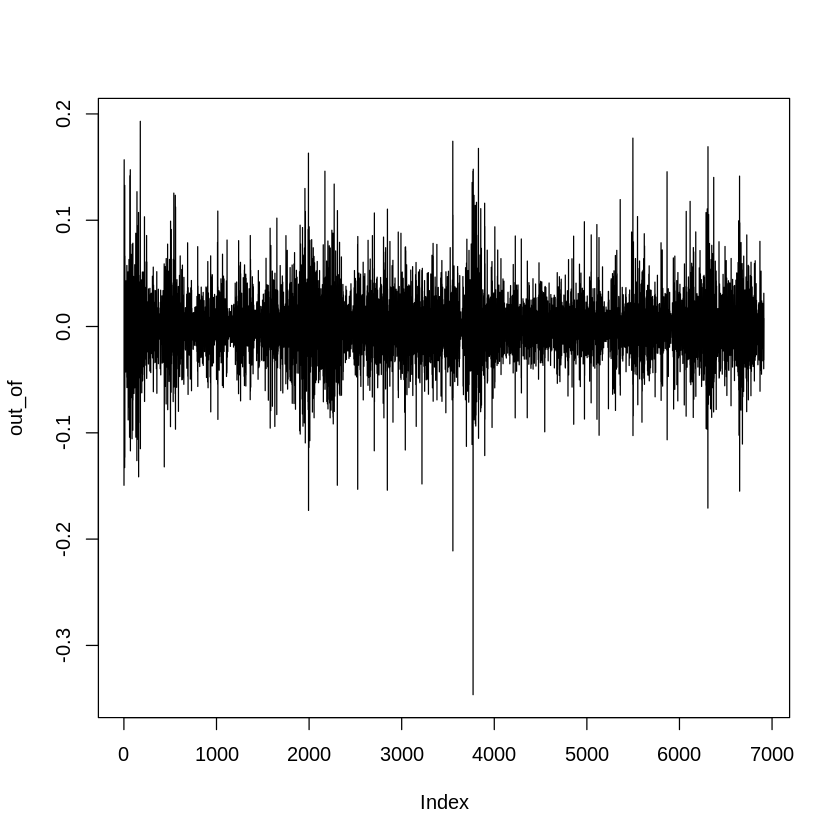

In [ ]:
plot(out_of, type = "l")